In [41]:
import nltk
import pickle
import networkx
import pandas as pd
file = open("GOTNetwork.pkl",'rb')
G = pickle.load(file)
file.close()

In [42]:
df = pd.read_csv("../data/scene_data.csv")
df

,Unnamed: 0,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,House,Affiliations
0,0,waymar royce,1,1,winter is coming,Unknown,What d'you expect? They're savages. One lot st...,House Royce,Night's Watch
1,1,will,1,1,winter is coming,Unknown,I've never seen wildlings do a thing like this...,NaN,Night's Watch
2,2,waymar royce,1,1,winter is coming,Unknown,How close did you get?,House Royce,Night's Watch
3,3,will,1,1,winter is coming,Unknown,Close as any man would.,NaN,Night's Watch
4,4,gared,1,1,winter is coming,Unknown,We should head back to the wall.,NaN,Night's Watch
...,...,...,...,...,...,...,...,...,...
23629,24997,sam,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,Uh... the Archmaester is less than enthusiasti...,NaN,NaN
23630,24998,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,"Well, I imagine he isn't using them properly.",Bronn's house,"Catelyn Stark, House Lannister, City Watch of ..."
23631,24999,brienne of tarth,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think we can all agree that ships take prece...,House Tarth,"House Baratheon, Kingsguard, Renly Baratheon, ..."
23632,25000,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think that's a very presumptuous statement.,Bronn's house,"Catelyn Stark, House Lannister, City Watch of ..."


Sentiment analysis for each person

In [43]:
def concatLinesby(df1, dflines):
    linesDict = dict()

    for d, lines in zip(df1,dflines):
        if d not in linesDict:
            linesDict[d] = ""
        try:
            linesDict[d] += " " + lines
        except TypeError:
            print("Error:", d, lines)
    return linesDict

linesDict = concatLinesby(df["Person"],df["ScreenLine"])

Error: daenerys targaryen nan
Error: luwin nan
Error: doran martell nan


In [44]:
import string, re
import matplotlib.pyplot as plt
wnl = nltk.WordNetLemmatizer()


def wordTokenize(wordString: str):
    
    stop_words = set(nltk.corpus.stopwords.words('english'))
    other_words = set(["n't"])
    stop_words = stop_words.union(other_words)
    tokens = nltk.tokenize.word_tokenize(wordString)

    filtered_tokens = [i.lower() for i in tokens if i.lower() not in list(string.punctuation) and re.match(f'\w+',i.lower()) and i.lower() not in stop_words]
    lemmatizedTokens = [wnl.lemmatize(t) for t in filtered_tokens]
    lemmatizedTokensUnfiltered = [wnl.lemmatize(t) for t in tokens]
    freqdist = nltk.FreqDist(lemmatizedTokens)
    return tokens, filtered_tokens, lemmatizedTokens, lemmatizedTokensUnfiltered, freqdist
    

def plotFreqdist(freqdist, title, nrofwordstoshow = 75):
    plt.figure(figsize=(15,6))
    freqdist.plot(nrofwordstoshow, title = title)

<>:13: SyntaxWarning: invalid escape sequence '\w'
<>:13: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_765829/1656759312.py:13: SyntaxWarning: invalid escape sequence '\w'
  filtered_tokens = [i.lower() for i in tokens if i.lower() not in list(string.punctuation) and re.match(f'\w+',i.lower()) and i.lower() not in stop_words]


In [45]:
import numpy as np
def concatLinesbyForHouse(df1, dflines):
    linesDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            if len(group.split(", ")) > 1:
                for d in group.split(", "):
                    #print(d)
                    
                    if d not in linesDict:
                        linesDict[d] = ""
                    try:
                        linesDict[d] += " " + lines
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in linesDict:
                    linesDict[group] = ""
                try:
                    linesDict[group] += " " + lines
                except TypeError:
                    print("Error:", group, lines)
        else:
            pass
    return linesDict



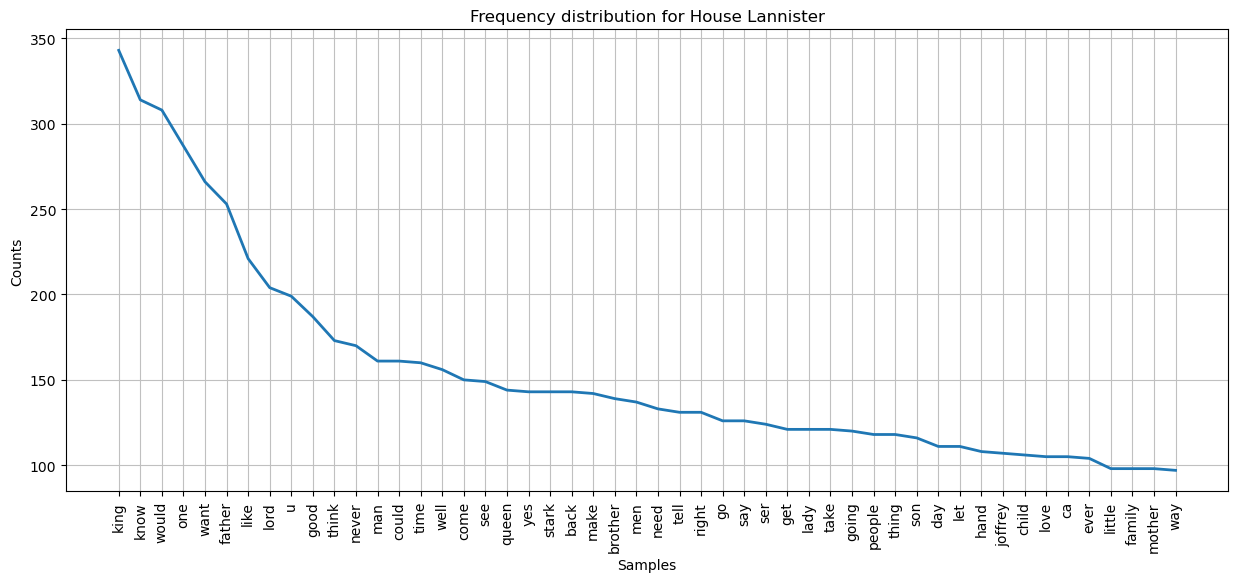

In [46]:
houseLinesDict = concatLinesbyForHouse(df["House"],df["ScreenLine"])
freqdist = wordTokenize(houseLinesDict["House Lannister"])[4]


plotFreqdist(freqdist, "Frequency distribution for House Lannister", nrofwordstoshow= 50)

In [47]:
txt = nltk.Text(wordTokenize(houseLinesDict["House Lannister"])[1])
txt.generate()

Building ngram index...


placed high value brother life lannister might lowest lannisters one
us every day girl prayed somewhere else back ever stannis baratheon
sacks city takes iron throne confessed crimes gave irrefutable
evidence guilt would matter cersei wo rest head spike offering
knighthood whomever finds sansa stark eldest daughter lord eddard last
spoke offered counsel allow return courtesy bend knee grace nothing
strips bold notions man head like melon high sparrow head every
sparrow head every sparrow head like melon high sparrow looks
surprised faith crown two pillars hold world one collapses must
everything necessary protect one another send raven message
littlefinger


'placed high value brother life lannister might lowest lannisters one\nus every day girl prayed somewhere else back ever stannis baratheon\nsacks city takes iron throne confessed crimes gave irrefutable\nevidence guilt would matter cersei wo rest head spike offering\nknighthood whomever finds sansa stark eldest daughter lord eddard last\nspoke offered counsel allow return courtesy bend knee grace nothing\nstrips bold notions man head like melon high sparrow head every\nsparrow head every sparrow head like melon high sparrow looks\nsurprised faith crown two pillars hold world one collapses must\neverything necessary protect one another send raven message\nlittlefinger'

In [48]:
import vaderSentiment.vaderSentiment as vs

def updateDict(dictionaryindexed, sc):
    dictionaryindexed["neg_score"] += sc["neg"]
    dictionaryindexed["pos_score"] += sc["pos"]
    dictionaryindexed["neu_score"] += sc["neu"]
    dictionaryindexed["summed_compound"] += sc["compound"]
    
    dictionaryindexed["sentence_count"] += 1
    dictionaryindexed["neg_count"] += 1
    dictionaryindexed["pos_count"] += 1
    return dictionaryindexed

def sentimentAnalysisbyGroup(df1, dflines):
    sidobj = vs.SentimentIntensityAnalyzer()
    houseScoreDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            
            if len(str(group).split(", ")) > 1:
                for d in str(group).split(", "):
                    #print(d)
                    
                    if d not in houseScoreDict:
                        houseScoreDict[d] = {"summed_compound": 0, "neg_score": 0, "pos_score": 0, "neu_score": 0, "sentence_count": 0, "neg_count": 0, "pos_count" : 0}
                    try:
                        sc = sidobj.polarity_scores(lines)
                        houseScoreDict[d] = updateDict(houseScoreDict[d],sc)
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in houseScoreDict:
                    houseScoreDict[group] = {"summed_compound": 0, "neg_score": 0, "pos_score": 0, "neu_score": 0, "sentence_count": 0, "neg_count": 0, "pos_count" : 0}
                try:
                    sc = sidobj.polarity_scores(lines)
                    houseScoreDict[group] = updateDict(houseScoreDict[group],sc)
                except TypeError:
                    print("Error:", group, lines)
    for group in houseScoreDict:
        houseScoreDict[group]["avg_sentiment"] = houseScoreDict[group]["summed_compound"] / houseScoreDict[group]["sentence_count"]
    return houseScoreDict

(-0.20953055555555555, 'House of Nakloz') (0.24699038461538458, 'House of Loraq')


<BarContainer object of 39 artists>

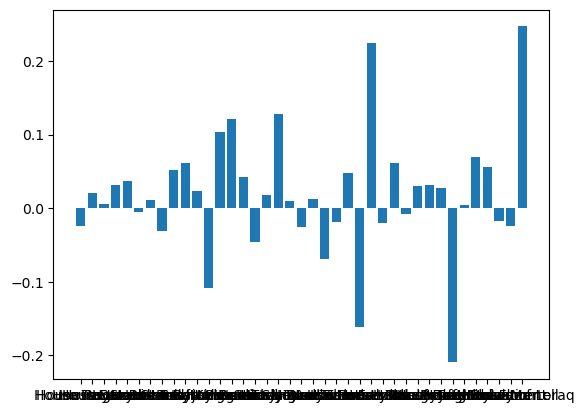

In [49]:
Sentiment = sentimentAnalysisbyGroup(df["House"],df["ScreenLine"])

min_sent = 0, None
max_sent = 0, None
xlist = []
ylist = []
for name in Sentiment:
    if Sentiment[name]["avg_sentiment"] < min_sent[0] and Sentiment[name]["sentence_count"] > 20:
        min_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["avg_sentiment"] > max_sent[0] and Sentiment[name]["sentence_count"] > 20:
        max_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["sentence_count"] > 20: 
        ylist.append((Sentiment[name]["avg_sentiment"]))
        xlist.append(name)
print(min_sent,max_sent)

plt.bar(xlist, ylist)

In [50]:
import vaderSentiment.vaderSentiment as vs
import numpy as np
sidobj = vs.SentimentIntensityAnalyzer()
sentimentList = []



for lines in df["ScreenLine"]:
    if lines != np.nan and str(lines) != "nan":         
        sc = sidobj.polarity_scores(lines)
        sentimentList.append(sc["compound"])
    else:
        sentimentList.append(np.nan)


print(sentimentList)
df["Sentiment"] = sentimentList
df
    


[-0.7717, 0.6124, 0.0, 0.0, 0.0, -0.7717, 0.4847, -0.5574, -0.6705, 0.3975, -0.6486, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4404, 0.3612, 0.8553, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0823, 0.2732, 0.0, 0.0, 0.0, 0.0, -0.5574, 0.2732, 0.0, 0.0, -0.8201, 0.0, 0.0772, 0.4215, 0.0, -0.5667, 0.0, 0.0, 0.0, -0.296, -0.4404, 0.0, -0.128, -0.296, 0.0, 0.0772, -0.6486, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.3802, -0.0772, 0.0, -0.5994, 0.0, 0.0, 0.0, 0.0, -0.1027, 0.0788, 0.1326, 0.0, 0.0, 0.0, 0.2787, 0.4939, 0.4939, 0.3612, 0.0, 0.3612, 0.0, 0.5751, 0.0, -0.4215, 0.0, 0.4404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4939, 0.0, -0.34, -0.7351, 0.8225, 0.0, 0.0, 0.0, 0.0, 0.3818, 0.3182, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4215, 0.0, 0.0, 0.4215, -0.7149, 0.4215, 0.0, 0.0, 0.5514, 0.0, 0.0, 0.3182, 0.0, 0.0, 0.296, 0.4215, 0.0, 0.0, 0.0, 0.0, 0.6908, 0.0, -0.6956, 0.0, 0.7424, 0.2008, -0.6283, 0.4215, 0.0, 0.0, 0.5413, 0.0, 0.0, 0.7351, 0.0, -0.4404, -0.296, 0.4588, 0.0, 0.0, 0.493

,Unnamed: 0,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,House,Affiliations,Sentiment
0,0,waymar royce,1,1,winter is coming,Unknown,What d'you expect? They're savages. One lot st...,House Royce,Night's Watch,-0.7717
1,1,will,1,1,winter is coming,Unknown,I've never seen wildlings do a thing like this...,NaN,Night's Watch,0.6124
2,2,waymar royce,1,1,winter is coming,Unknown,How close did you get?,House Royce,Night's Watch,0.0000
3,3,will,1,1,winter is coming,Unknown,Close as any man would.,NaN,Night's Watch,0.0000
4,4,gared,1,1,winter is coming,Unknown,We should head back to the wall.,NaN,Night's Watch,0.0000
...,...,...,...,...,...,...,...,...,...,...
23629,24997,sam,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,Uh... the Archmaester is less than enthusiasti...,NaN,NaN,0.4445
23630,24998,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,"Well, I imagine he isn't using them properly.",Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",0.2732
23631,24999,brienne of tarth,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think we can all agree that ships take prece...,House Tarth,"House Baratheon, Kingsguard, Renly Baratheon, ...",0.3612
23632,25000,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think that's a very presumptuous statement.,Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",0.0000


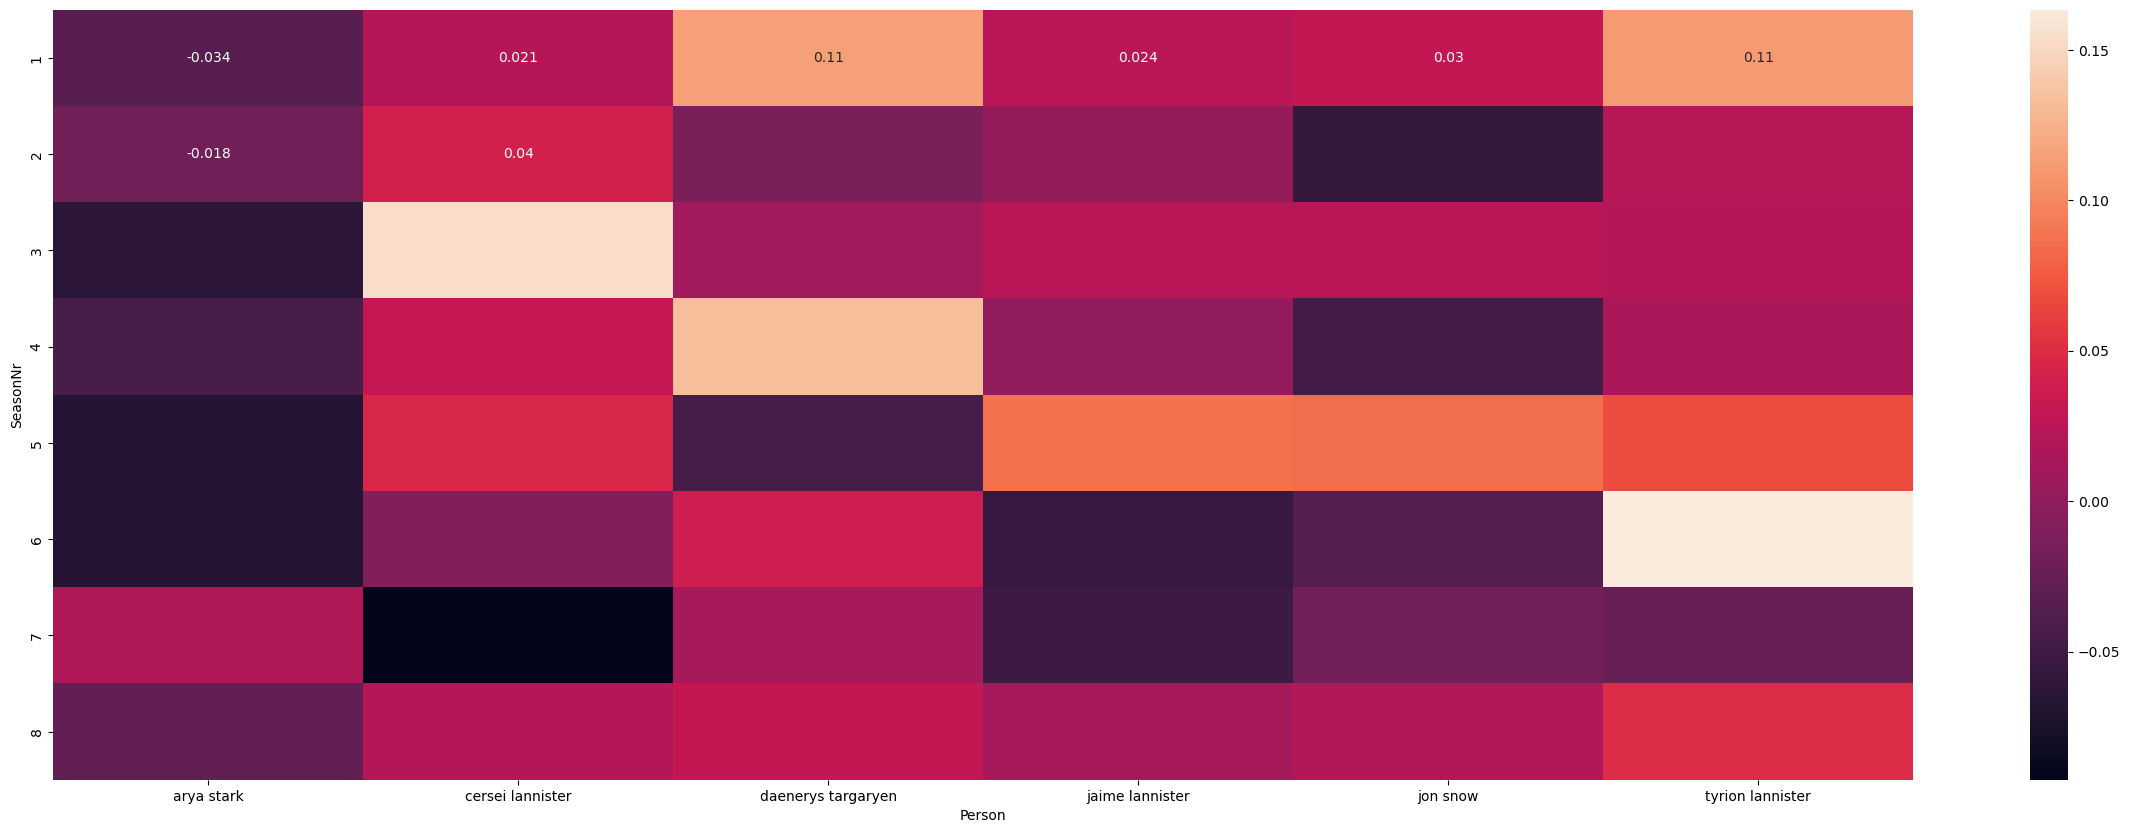

,Unnamed: 0,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,House,Affiliations,Sentiment
0,0,waymar royce,1,1,winter is coming,Unknown,What d'you expect? They're savages. One lot st...,House Royce,Night's Watch,-0.7717
1,1,will,1,1,winter is coming,Unknown,I've never seen wildlings do a thing like this...,NaN,Night's Watch,0.6124
2,2,waymar royce,1,1,winter is coming,Unknown,How close did you get?,House Royce,Night's Watch,0.0000
3,3,will,1,1,winter is coming,Unknown,Close as any man would.,NaN,Night's Watch,0.0000
4,4,gared,1,1,winter is coming,Unknown,We should head back to the wall.,NaN,Night's Watch,0.0000
...,...,...,...,...,...,...,...,...,...,...
23629,24997,sam,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,Uh... the Archmaester is less than enthusiasti...,NaN,NaN,0.4445
23630,24998,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,"Well, I imagine he isn't using them properly.",Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",0.2732
23631,24999,brienne of tarth,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think we can all agree that ships take prece...,House Tarth,"House Baratheon, Kingsguard, Renly Baratheon, ...",0.3612
23632,25000,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think that's a very presumptuous statement.,Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",0.0000


In [52]:
#Creating heatmap showing SeasonNr and House and sentiment as the color
import seaborn as sns

            

def createHeatMap(column1, column2, values, dataframe):
    #dataframe = dataframe.groupby(column1).agg('mean')
    #dataframe = dataframe.groupby(column1)[values].mean()

    #dataframe.drop_duplicates([column1,column2], inplace=True)
    #pivot = dataframe.pivot(index = column1, columns = column2, values = values)
    #print(pivot)
    heatmap_data = dataframe.groupby([column1, column2])[values].mean().unstack()

    plt.figure(figsize = (30, 10))
    ax = sns.heatmap(heatmap_data,annot=True)
    plt.show()
    return

names_to_match = ['jon snow', 'jaime lannister', 'tyrion lannister','daenerys targaryen','arya stark','cersei lannister']
createHeatMap("SeasonNr","Person","Sentiment", df[df["Person"].isin(names_to_match)])
#plt.imshow(df, cmap='hot', interpolation='nearest')
df

In [ ]:
import textblob as tb
def sentimentAnalysisbyGroupBlob(df1, dflines):
    
    houseScoreDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            
            if len(str(group).split(", ")) > 1:
                for d in str(group).split(", "):
                    #print(d)
                    
                    if d not in houseScoreDict:
                        houseScoreDict[d] = {"summed_compound": 0, "sentence_count": 0}
                    try:
                        sc = tb.TextBlob(lines).sentiment
                        
                        houseScoreDict[d]["summed_compound"] += sc.polarity
                        houseScoreDict[d]["sentence_count"] += 1
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in houseScoreDict:
                    houseScoreDict[group] = {"summed_compound": 0, "sentence_count": 0}
                try:
                    sc = tb.TextBlob(lines).sentiment

                    houseScoreDict[group]["summed_compound"] += sc.polarity
                    houseScoreDict[group]["sentence_count"] += 1
                except TypeError:
                    print("Error:", group, lines, sc)
    for group in houseScoreDict:
        houseScoreDict[group]["avg_sentiment"] = houseScoreDict[group]["summed_compound"] / houseScoreDict[group]["sentence_count"]
    return houseScoreDict

(-0.033042741402116396, 'House Umber') (0.14084360925270015, 'House Hollard')


<BarContainer object of 39 artists>

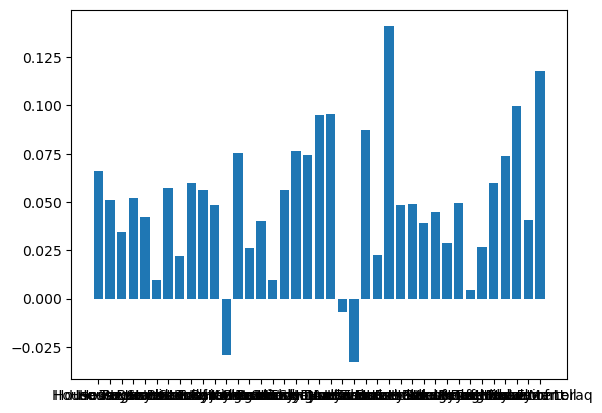

In [171]:
Sentiment = sentimentAnalysisbyGroupBlob(df["House"],df["ScreenLine"])

min_sent = 0, None
max_sent = 0, None
xlist = []
ylist = []
for name in Sentiment:
    if Sentiment[name]["avg_sentiment"] < min_sent[0] and Sentiment[name]["sentence_count"] > 20:
        min_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["avg_sentiment"] > max_sent[0] and Sentiment[name]["sentence_count"] > 20:
        max_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["sentence_count"] > 20: 
        ylist.append((Sentiment[name]["avg_sentiment"]))
        xlist.append(name)
print(min_sent,max_sent)

plt.bar(xlist, ylist)

In [230]:
def sentimentFunction(listoftokens):
    
    sentiment = 0
    
    fdist = nltk.FreqDist(tk.lower() for tk in listoftokens)
    freqsum = 0
    for token in sorted(fdist):
        if token in worddict:
            freq = float(fdist[token])
            freqsum += freq
            if worddict[token] < 5:
                sentiment -= freq
            else:
                sentiment += freq
    
    
    
    if freqsum == 0:
        return 0
    
    return sentiment


wordlist = pd.read_csv("../data/SentimentML.tsv", sep = "\t")

worddict = {word:float(hapavg) for word, hapavg in zip(wordlist.word, wordlist.happiness_average)}

In [233]:
def sentimentAnalysisbyGroupManual(df1, dflines):
    
    houseScoreDict = dict()
   
    for group, lines in zip(df1,dflines):
        try: 
            lemmatizedTokens = wordTokenize(lines)[2]
            if group not in houseScoreDict:
                houseScoreDict[group] = []
                try: 
                    houseScoreDict[group] = {"summed_compound": sentimentFunction(lemmatizedTokens), "sentence_count" : 0}
                except TypeError as error:
                    #print(error)
                    pass
                
            else:
                try:
                    houseScoreDict[group]["summed_compound"] += sentimentFunction(lemmatizedTokens)
                    houseScoreDict[group]["sentence_count"] += 1
                except TypeError as error:
                    #print(error)
                    pass
        except TypeError as error:
            #print(error)
            pass
        
    poplist = []
    for group in houseScoreDict:
        try:
            houseScoreDict[group]["avg_sentiment"] = houseScoreDict[group]["summed_compound"] / houseScoreDict[group]["sentence_count"]
        except ZeroDivisionError as error:
            #print(error)
            poplist.append(group)
    
    for entry in poplist:
        houseScoreDict.pop(entry)

    return houseScoreDict


In [254]:
Sentiment = sentimentAnalysisbyGroupManual(df["Person"],df["ScreenLine"])
min_sent = None, None
max_sent = None, None
xlist = []
ylist = []
for name in Sentiment:
    if min_sent[0] is None:
        min_sent = Sentiment[name]["avg_sentiment"], name
        max_sent = Sentiment[name]["avg_sentiment"], name
    else:
        if Sentiment[name]["avg_sentiment"] < min_sent[0] and Sentiment[name]["sentence_count"] > 20:
            min_sent = Sentiment[name]["avg_sentiment"], name
        if Sentiment[name]["avg_sentiment"] > max_sent[0] and Sentiment[name]["sentence_count"] > 20:
            max_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["sentence_count"] > 100: 
        ylist.append((Sentiment[name]["avg_sentiment"]))
        xlist.append(name)


(0.7142857142857143, 'izembaro') (5.824561403508772, 'aemon')


<BarContainer object of 52 artists>

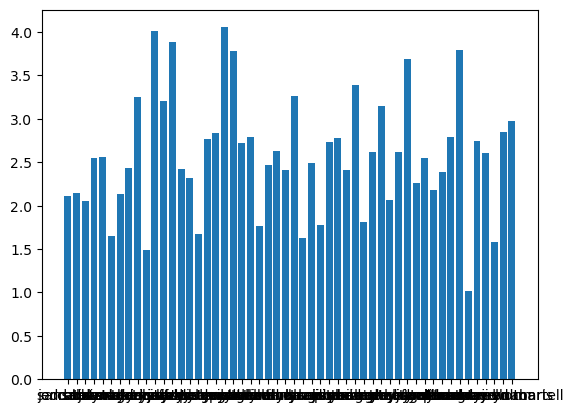

In [255]:
print(min_sent,max_sent)
plt.bar(xlist, ylist)

In [237]:
print(Sentiment)

{1: {'summed_compound': 9353.0, 'sentence_count': 3309, 'avg_sentiment': 2.826533695980659}, 2: {'summed_compound': 9727.0, 'sentence_count': 3707, 'avg_sentiment': 2.6239546803345024}, 3: {'summed_compound': 9457.0, 'sentence_count': 3751, 'avg_sentiment': 2.5211943481738204}, 4: {'summed_compound': 8484.0, 'sentence_count': 3404, 'avg_sentiment': 2.4923619271445356}, 5: {'summed_compound': 7930.0, 'sentence_count': 2871, 'avg_sentiment': 2.762103796586555}, 6: {'summed_compound': 6951.0, 'sentence_count': 2659, 'avg_sentiment': 2.6141406543813464}, 7: {'summed_compound': 6051.0, 'sentence_count': 2245, 'avg_sentiment': 2.6953229398663696}, 8: {'summed_compound': 3697.0, 'sentence_count': 1677, 'avg_sentiment': 2.204531902206321}}
